In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from IPython.display import Image
from sklearn.tree import export_graphviz
from six import StringIO
import graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pydotplus

In [28]:
wine_data = pd.read_csv("../../data/winequality_red.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot: >

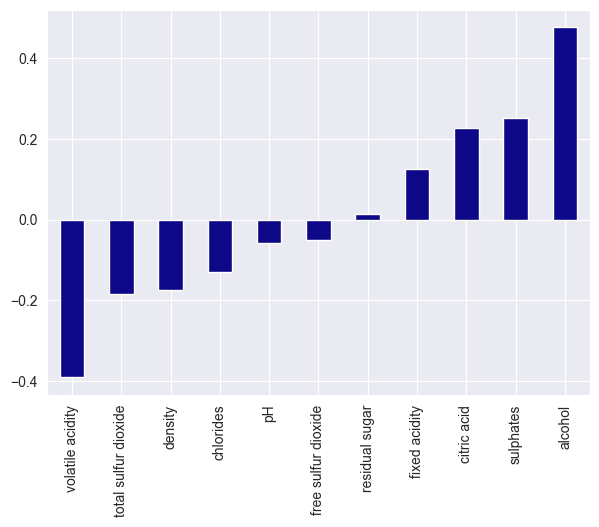

In [33]:
wine_data.corr()['quality'][:-1].sort_values().plot(kind='bar', figsize=(7, 5), colormap='plasma')

In [34]:
wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [35]:
wine_data['quality_binary'] = wine_data.quality.apply(lambda x: 1 if x > 6 else 0)

In [36]:
wine_data.quality_binary.value_counts()

0    1382
1     217
Name: quality_binary, dtype: int64

In [37]:
X = wine_data.drop(columns=['quality', 'quality_binary']).values
y = wine_data.quality_binary.values.reshape(-1, 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=355)

In [40]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = clf.predict(X_test)

In [42]:
clf.score(X_train, y_train)

1.0

In [43]:
clf.score(X_test, y_test)

0.8825

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       354
           1       0.49      0.70      0.58        46

    accuracy                           0.88       400
   macro avg       0.73      0.80      0.75       400
weighted avg       0.90      0.88      0.89       400



In [45]:
confusion_matrix(y_test, y_pred)

array([[321,  33],
       [ 14,  32]])

In [46]:
roc_auc_score(y_test, y_pred)

0.8012159174649963

In [48]:
feature_set = wine_data.drop(columns=['quality', 'quality_binary']).columns
feature_set

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [49]:
dot_data = tree.export_graphviz(
    clf,
    feature_names=feature_set,
    out_file='tree_values.dot',
    class_names='quality',
    filled=True,
    rounded=True,
    special_characters=True
)
(graph,) = pydot.graph_from_dot_file('tree_values.dot')
graph.write_png('DT_classifier.png')

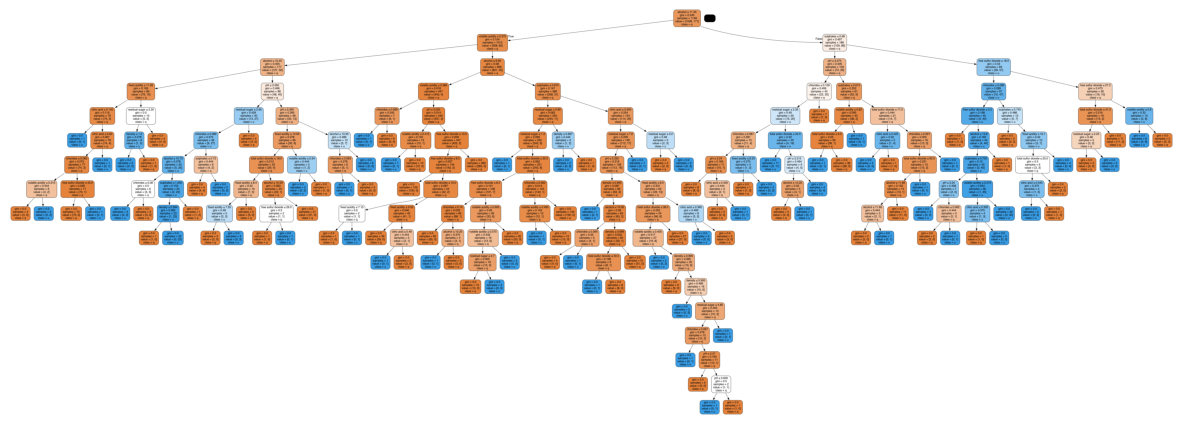

In [50]:
plt.subplots(figsize=(15, 15))
plt.axis('off')
plt.imshow(mpimg.imread('DT_classifier.png'))

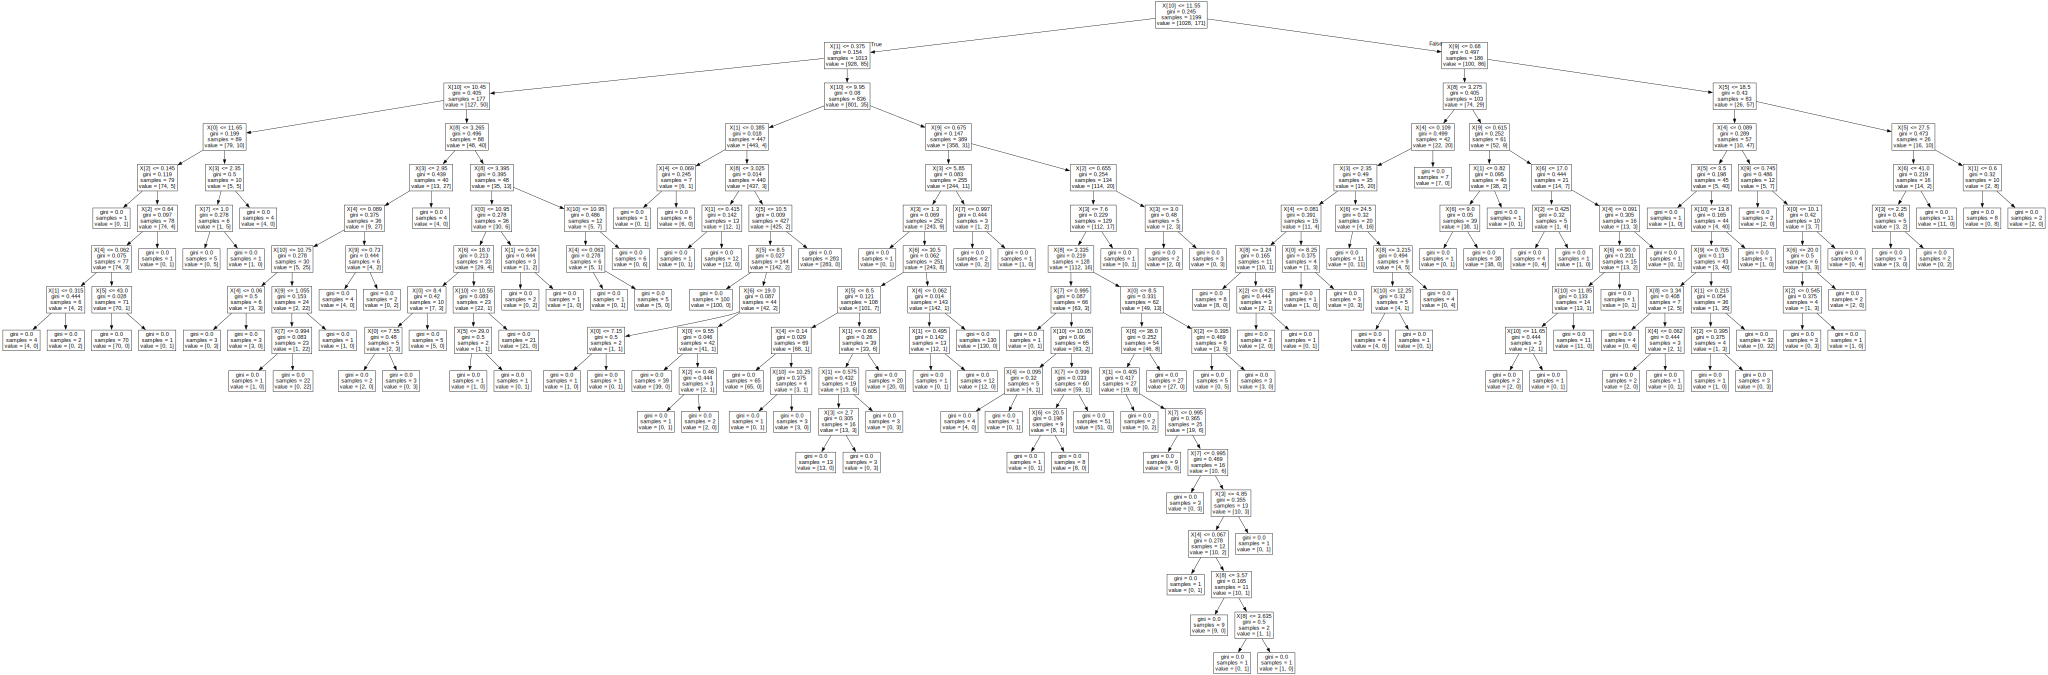

In [51]:
dot_data = tree.export_graphviz(clf)
graph = graphviz.Source(dot_data)
graph

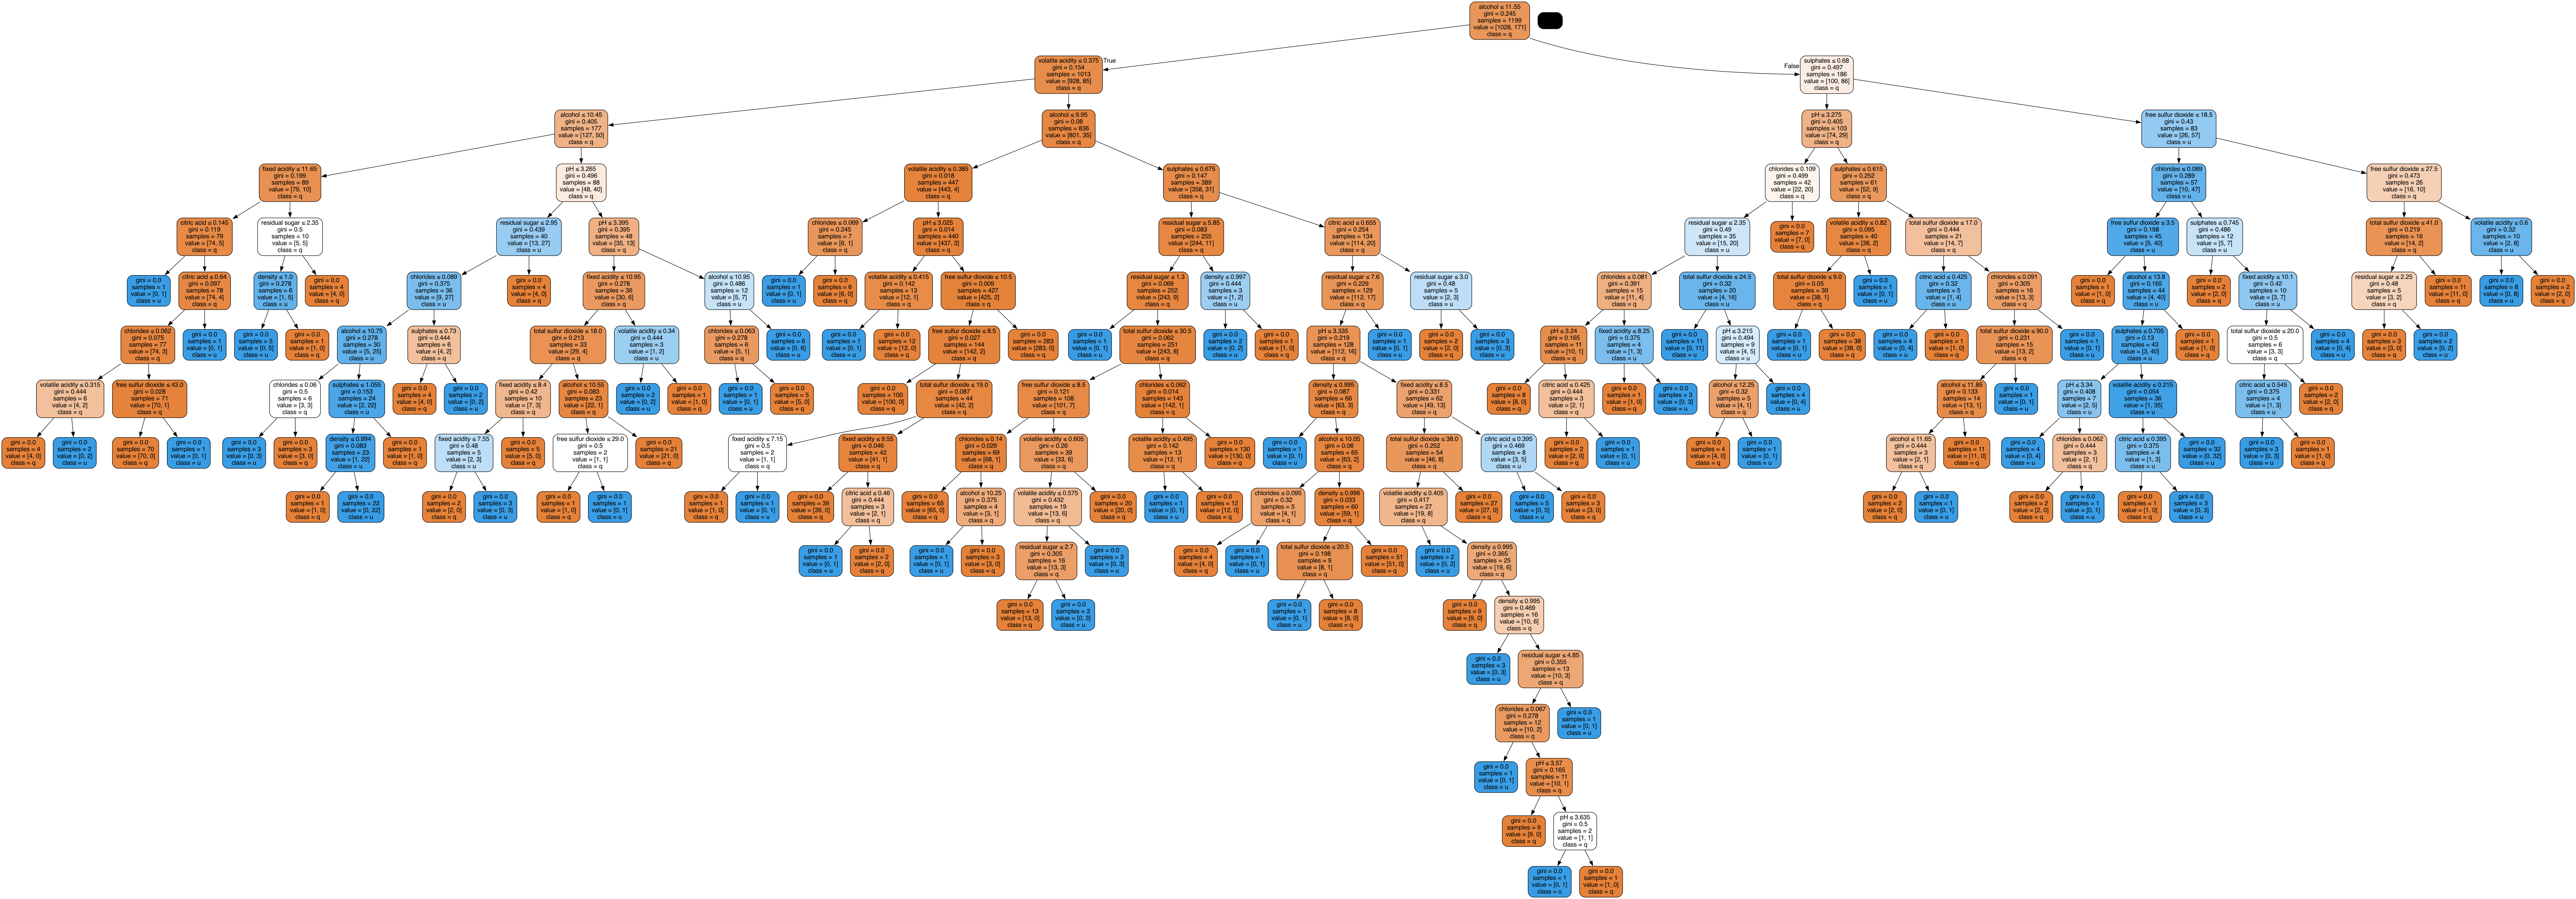

In [52]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_set, class_names='quality')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('winequality.png')
Image(graph.create_png())

In [53]:
grid_param = {
    "criterion": ['gini', 'entropy'],
    "splitter": ['best', 'random'],
    "max_depth": range(2, 40, 1),
    "min_samples_split": range(2, 10, 1),
    "min_samples_leaf": range(1, 10, 1),
}

In [54]:
grid_cv = GridSearchCV(estimator=clf, param_grid=grid_param, cv=5, n_jobs=-1)

In [55]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [58]:
model_cv_new = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=2,
    min_samples_split=6,
    splitter='random'
)

In [59]:
model_cv_new.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=6, splitter='random')

In [60]:
model_cv_new.score(X_train, y_train)

0.8932443703085905

In [61]:
model_cv_new.score(X_test, y_test)

0.8825